# GERAK JATUH BEBAS DAN GERAK PARABOLA

Notebook ini menggabungkan analisis:
1. **Gerak Jatuh Bebas** - Kelapa jatuh dari pohon
2. **Gerak Parabola** - Peluru meriam ditembakkan dengan sudut elevasi

---

# BAGIAN 1: GERAK JATUH BEBAS

## Soal
Tinjaulah suatu kejadian gerak jatuh bebas. Suatu kelapa terjatuh dari pohonnya yang memiliki ketinggian 10m. Tentukan waktu maksimum Andi dengan tinggi 160 cm untuk bereaksi supaya tidak tertimpa buah kelapa yang jatuh.

In [18]:
# Import libraries yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import math

## 1.1 Metode Analitik - Gerak Jatuh Bebas

In [19]:
# Data yang diberikan
tinggi_pohon = 10  # meter
tinggi_andi = 1.6  # meter
gravitasi_gjb = 9.8  # m/s^2

# Hitung jarak yang ditempuh kelapa hingga mencapai kepala Andi
jarak_jatuh = tinggi_pohon - tinggi_andi

# Hitung waktu reaksi (waktu untuk mencapai tinggi Andi)
waktu_reaksi = math.sqrt((2 * jarak_jatuh) / gravitasi_gjb)

# Hitung waktu total untuk jatuh ke tanah
waktu_total_jatuh = math.sqrt((2 * tinggi_pohon) / gravitasi_gjb)

# Menampilkan hasil perhitungan
print("=" * 60)
print("GERAK JATUH BEBAS - METODE ANALITIK")
print("=" * 60)
print(f"Tinggi pohon: {tinggi_pohon} m")
print(f"Tinggi Andi: {tinggi_andi} m")
print(f"Jarak jatuh kelapa hingga mengenai Andi: {jarak_jatuh:.2f} m")
print(f"Percepatan gravitasi: {gravitasi_gjb} m/s²")
print("-" * 60)
print(f" Waktu reaksi maksimum Andi: {waktu_reaksi:.4f} detik")
print(f" Waktu total jatuh ke tanah: {waktu_total_jatuh:.4f} detik")
print("=" * 60)

GERAK JATUH BEBAS - METODE ANALITIK
Tinggi pohon: 10 m
Tinggi Andi: 1.6 m
Jarak jatuh kelapa hingga mengenai Andi: 8.40 m
Percepatan gravitasi: 9.8 m/s²
------------------------------------------------------------
 Waktu reaksi maksimum Andi: 1.3093 detik
 Waktu total jatuh ke tanah: 1.4286 detik


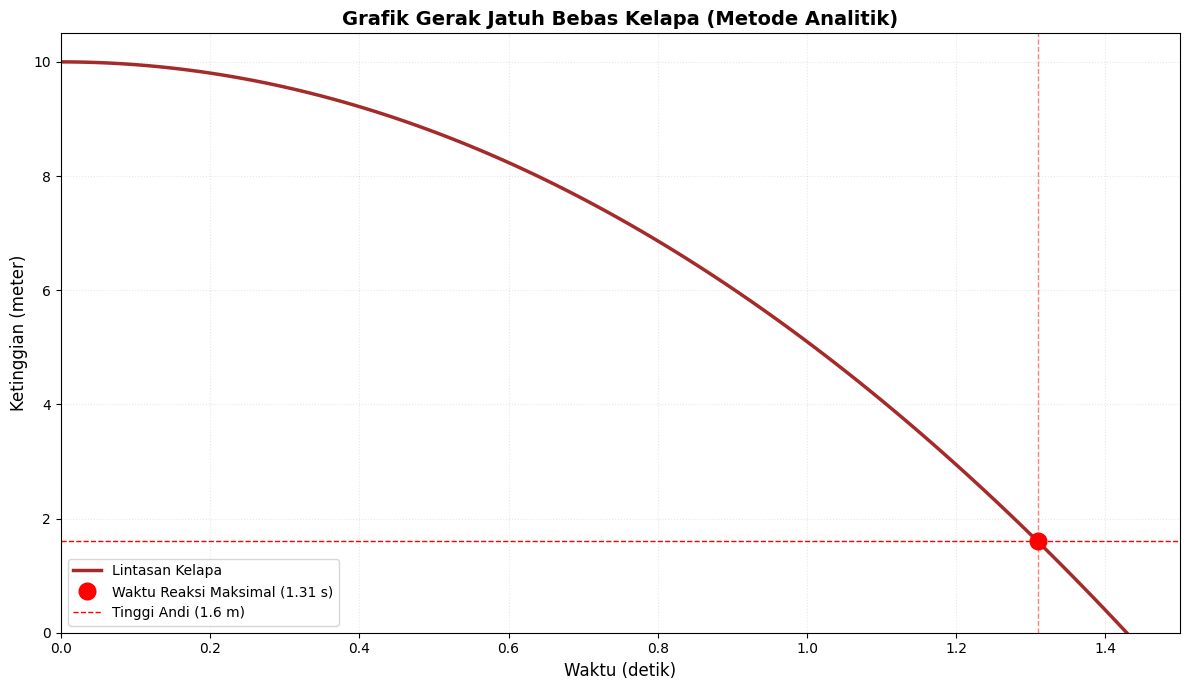

✓ Plot gerak jatuh bebas (analitik) selesai!


In [20]:
# Visualisasi Gerak Jatuh Bebas - Analitik

# Membuat rentang waktu dari 0 hingga waktu total jatuh
t_gjb = np.linspace(0, waktu_total_jatuh, 100)

# Menghitung ketinggian pada setiap waktu t
h_gjb = tinggi_pohon - 0.5 * gravitasi_gjb * t_gjb**2

# Membuat Plot
plt.figure(figsize=(12, 7))
plt.plot(t_gjb, h_gjb, label='Lintasan Kelapa', color='brown', linewidth=2.5)

# Menandai titik kritis
plt.plot(waktu_reaksi, tinggi_andi, 'o', markersize=12, color='red', 
         label=f'Waktu Reaksi Maksimal ({waktu_reaksi:.2f} s)')

# Garis bantu
plt.axhline(y=tinggi_andi, color='red', linestyle='--', linewidth=1, 
            label=f'Tinggi Andi ({tinggi_andi} m)')
plt.axvline(x=waktu_reaksi, color='red', linestyle='--', linewidth=1, alpha=0.5)

# Kustomisasi Plot
plt.title('Grafik Gerak Jatuh Bebas Kelapa (Metode Analitik)', fontsize=14, fontweight='bold')
plt.xlabel('Waktu (detik)', fontsize=12)
plt.ylabel('Ketinggian (meter)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, linestyle=':')
plt.xlim(0, waktu_total_jatuh * 1.05)
plt.ylim(0, tinggi_pohon * 1.05)
plt.tight_layout()
plt.show()

print("✓ Plot gerak jatuh bebas (analitik) selesai!")

## 1.2 Metode Numerik - Gerak Jatuh Bebas (Euler Method)

In [21]:
# Solusi Numerik menggunakan Metode Euler

# Parameter untuk metode numerik
tinggi_awal = 10  # meter
g_numerik = 9.8   # m/s^2
dt_gjb = 0.01     # time step (detik)

# Inisialisasi variabel
waktu_numerik_gjb = [0]
tinggi_numerik_gjb = [tinggi_awal]
kecepatan_numerik_gjb = 0
t_numerik_gjb = 0
h_numerik_gjb = tinggi_awal

# Variabel untuk mencari waktu reaksi Andi
waktu_reaksi_numerik = None
found_andi_height = False

print("=" * 60)
print("GERAK JATUH BEBAS - METODE NUMERIK (EULER)")
print("=" * 60)
print(f"Time step (Δt): {dt_gjb} s")
print("Simulasi dimulai...")

# Loop simulasi hingga objek menyentuh tanah
while h_numerik_gjb > 0:
    # Update posisi menggunakan kecepatan sebelumnya
    h_numerik_gjb = h_numerik_gjb - kecepatan_numerik_gjb * dt_gjb
    
    # Update kecepatan untuk langkah berikutnya
    kecepatan_numerik_gjb = kecepatan_numerik_gjb + g_numerik * dt_gjb
    
    # Update waktu
    t_numerik_gjb += dt_gjb
    
    # Cek apakah mencapai tinggi Andi
    if not found_andi_height and h_numerik_gjb <= tinggi_andi:
        waktu_reaksi_numerik = t_numerik_gjb
        found_andi_height = True
    
    # Simpan hasil
    waktu_numerik_gjb.append(t_numerik_gjb)
    tinggi_numerik_gjb.append(h_numerik_gjb)

print(f"✓ Simulasi selesai!")
print(f"  Total iterasi: {len(waktu_numerik_gjb)}")
print(f"  Waktu total jatuh (numerik): {t_numerik_gjb:.4f} s")
if waktu_reaksi_numerik:
    print(f"  Waktu reaksi Andi (numerik): {waktu_reaksi_numerik:.4f} s")
print("=" * 60)

GERAK JATUH BEBAS - METODE NUMERIK (EULER)
Time step (Δt): 0.01 s
Simulasi dimulai...
✓ Simulasi selesai!
  Total iterasi: 145
  Waktu total jatuh (numerik): 1.4400 s
  Waktu reaksi Andi (numerik): 1.3200 s


## 1.3 Perbandingan Analitik vs Numerik - Gerak Jatuh Bebas

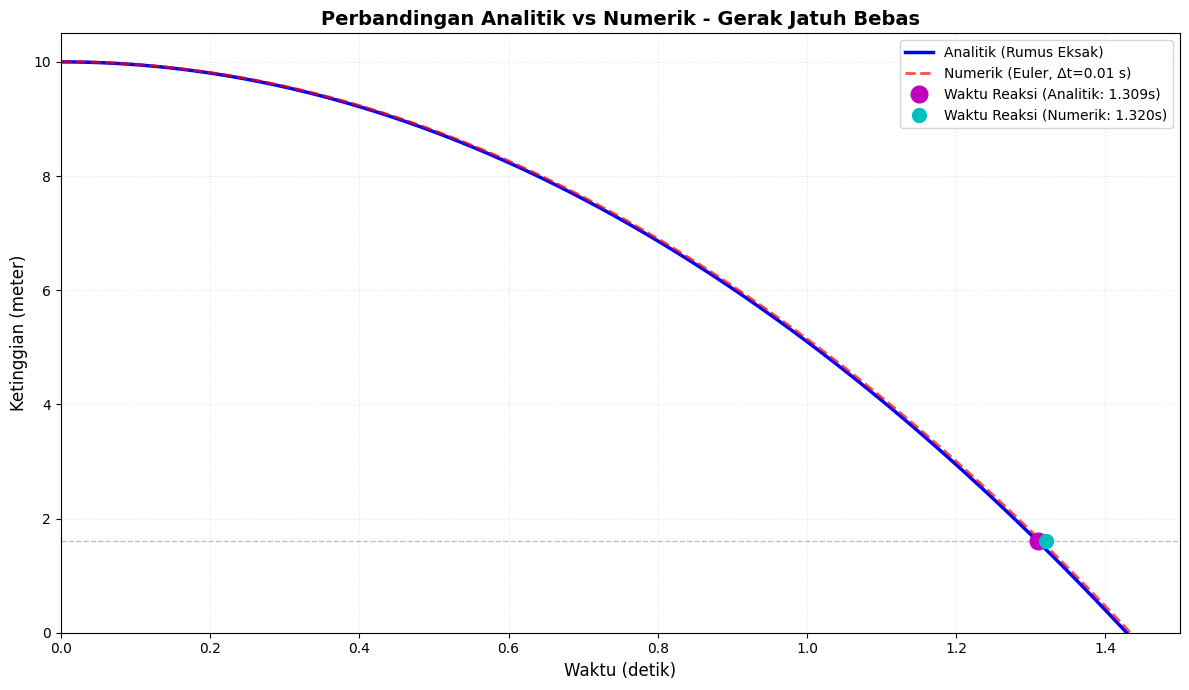

✓ Plot perbandingan selesai!

ANALISIS ERROR
Waktu Reaksi Analitik : 1.3093 s
Waktu Reaksi Numerik  : 1.3200 s
Error Absolut         : 0.010693 s
Error Persentase      : 0.8167%


In [22]:
# Plot Perbandingan Analitik vs Numerik untuk Gerak Jatuh Bebas

plt.figure(figsize=(12, 7))

# Plot solusi analitik
plt.plot(t_gjb, h_gjb, 'b-', label='Analitik (Rumus Eksak)', linewidth=2.5)

# Plot solusi numerik
plt.plot(waktu_numerik_gjb, tinggi_numerik_gjb, 'r--', 
         label=f'Numerik (Euler, Δt={dt_gjb} s)', linewidth=2, alpha=0.7)

# Titik-titik penting
plt.plot(waktu_reaksi, tinggi_andi, 'mo', markersize=12, 
         label=f'Waktu Reaksi (Analitik: {waktu_reaksi:.3f}s)', zorder=5)

if waktu_reaksi_numerik:
    plt.plot(waktu_reaksi_numerik, tinggi_andi, 'co', markersize=10, 
             label=f'Waktu Reaksi (Numerik: {waktu_reaksi_numerik:.3f}s)', zorder=5)

# Garis bantu
plt.axhline(y=tinggi_andi, color='purple', linestyle='--', linewidth=1, alpha=0.3)

plt.title('Perbandingan Analitik vs Numerik - Gerak Jatuh Bebas', 
          fontsize=14, fontweight='bold')
plt.xlabel('Waktu (detik)', fontsize=12)
plt.ylabel('Ketinggian (meter)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, linestyle=':')
plt.xlim(0, waktu_total_jatuh * 1.05)
plt.ylim(0, tinggi_pohon * 1.05)
plt.tight_layout()
plt.show()

print("✓ Plot perbandingan selesai!")

# Tampilkan error
print("\n" + "=" * 60)
print("ANALISIS ERROR")
print("=" * 60)
if waktu_reaksi_numerik:
    error_waktu = abs(waktu_reaksi - waktu_reaksi_numerik)
    error_persen = (error_waktu / waktu_reaksi) * 100
    print(f"Waktu Reaksi Analitik : {waktu_reaksi:.4f} s")
    print(f"Waktu Reaksi Numerik  : {waktu_reaksi_numerik:.4f} s")
    print(f"Error Absolut         : {error_waktu:.6f} s")
    print(f"Error Persentase      : {error_persen:.4f}%")
print("=" * 60)

### Penjelasan Rumus Gerak Jatuh Bebas

Untuk gerak jatuh bebas, berlaku:

**Rumus Ketinggian:**
$$h(t) = h_0 - \frac{1}{2}gt^2$$

**Rumus Waktu:**
$$t = \sqrt{\frac{2h}{g}}$$

Di mana:
- $h_0$ = ketinggian awal
- $g$ = percepatan gravitasi
- $t$ = waktu
- $h$ = jarak tempuh

---

# BAGIAN 2: GERAK PARABOLA

## Soal
Suatu Meriam ditembakkan dengan sudut kemiringan 60 derajat, kecepatan awal dari peluru yang ditembakkan adalah 10 m/s. Berdasarkan perhitungan:
- Tentukan waktu yang diperlukan oleh peluru untuk mencapai ketinggian 2/3 dari ketinggian maksimum
- Tentukan waktu yang diperlukan oleh peluru untuk mencapai 2/3 jarak maksimum

## 2.1 Metode Analitik - Gerak Parabola

In [23]:
# Data yang diberikan untuk gerak parabola
v0 = 10  # kecepatan awal (m/s)
theta = 60  # sudut kemiringan (derajat)
g = 9.8  # percepatan gravitasi (m/s^2)

# Konversi sudut ke radian
theta_rad = np.radians(theta)

# Komponen kecepatan awal
v0x = v0 * np.cos(theta_rad)  # kecepatan horizontal
v0y = v0 * np.sin(theta_rad)  # kecepatan vertikal

print("=" * 60)
print("GERAK PARABOLA - METODE ANALITIK")
print("=" * 60)
print(f"\nData Awal:")
print(f"  Kecepatan awal (v₀) = {v0} m/s")
print(f"  Sudut elevasi (θ) = {theta}°")
print(f"  Percepatan gravitasi (g) = {g} m/s²")
print(f"\nKomponen Kecepatan:")
print(f"  v₀ₓ = v₀ cos(θ) = {v0x:.4f} m/s")
print(f"  v₀ᵧ = v₀ sin(θ) = {v0y:.4f} m/s")
print("=" * 60)

GERAK PARABOLA - METODE ANALITIK

Data Awal:
  Kecepatan awal (v₀) = 10 m/s
  Sudut elevasi (θ) = 60°
  Percepatan gravitasi (g) = 9.8 m/s²

Komponen Kecepatan:
  v₀ₓ = v₀ cos(θ) = 5.0000 m/s
  v₀ᵧ = v₀ sin(θ) = 8.6603 m/s


In [24]:
# Hitung parameter maksimum

# Ketinggian maksimum
H_max = (v0y ** 2) / (2 * g)

# Waktu untuk mencapai ketinggian maksimum
t_max_height = v0y / g

# Jarak maksimum (range)
R_max = (v0 ** 2 * np.sin(2 * theta_rad)) / g

# Waktu total di udara
t_total = 2 * v0y / g

print("\n1. PARAMETER MAKSIMUM:")
print(f"  Ketinggian maksimum (H_max) = {H_max:.4f} m")
print(f"  Waktu mencapai H_max = {t_max_height:.4f} s")
print(f"  Jarak maksimum (R_max) = {R_max:.4f} m")
print(f"  Waktu total di udara = {t_total:.4f} s")


1. PARAMETER MAKSIMUM:
  Ketinggian maksimum (H_max) = 3.8265 m
  Waktu mencapai H_max = 0.8837 s
  Jarak maksimum (R_max) = 8.8370 m
  Waktu total di udara = 1.7674 s


In [25]:
# Hitung waktu untuk mencapai 2/3 ketinggian maksimum

# Target ketinggian
h_target = (2/3) * H_max

print("\n2. WAKTU MENCAPAI 2/3 KETINGGIAN MAKSIMUM:")
print(f"  Target ketinggian = (2/3) × {H_max:.4f} = {h_target:.4f} m")

# Persamaan kuadrat: ½g·t² - v₀ᵧ·t + h = 0
a = g / 2
b = -v0y
c = h_target

# Rumus kuadrat
discriminant = b**2 - 4*a*c
t1 = (-b + np.sqrt(discriminant)) / (2*a)
t2 = (-b - np.sqrt(discriminant)) / (2*a)

print(f"\n  Menyelesaikan persamaan: {a:.1f}t² + ({b:.4f})t + {c:.4f} = 0")
print(f"\n  Solusi kuadrat:")
print(f"    t₁ = {t1:.4f} s (saat naik)")
print(f"    t₂ = {t2:.4f} s (saat turun)")
print(f"\n  ✓ Peluru mencapai ketinggian {h_target:.4f} m pada:")
print(f"    - t = {t1:.4f} s (fase naik)")
print(f"    - t = {t2:.4f} s (fase turun)")
print("=" * 60)


2. WAKTU MENCAPAI 2/3 KETINGGIAN MAKSIMUM:
  Target ketinggian = (2/3) × 3.8265 = 2.5510 m

  Menyelesaikan persamaan: 4.9t² + (-8.6603)t + 2.5510 = 0

  Solusi kuadrat:
    t₁ = 1.3939 s (saat naik)
    t₂ = 0.3735 s (saat turun)

  ✓ Peluru mencapai ketinggian 2.5510 m pada:
    - t = 1.3939 s (fase naik)
    - t = 0.3735 s (fase turun)


In [26]:
# Hitung waktu untuk mencapai 2/3 jarak maksimum

# Target jarak horizontal
x_target = (2/3) * R_max

# Dari persamaan x(t) = v₀ₓ·t
t_2_3_range = x_target / v0x

# Hitung ketinggian pada saat itu
y_at_2_3_range = v0y * t_2_3_range - 0.5 * g * t_2_3_range**2

print("\n3. WAKTU MENCAPAI 2/3 JARAK MAKSIMUM:")
print(f"  Target jarak horizontal = (2/3) × {R_max:.4f} = {x_target:.4f} m")
print(f"\n  Dari persamaan: x = v₀ₓ × t")
print(f"  Maka: t = x / v₀ₓ = {x_target:.4f} / {v0x:.4f}")
print(f"\n   Peluru mencapai jarak {x_target:.4f} m pada:")
print(f"    t = {t_2_3_range:.4f} s")
print(f"    Ketinggian saat itu = {y_at_2_3_range:.4f} m")
print("=" * 60)


3. WAKTU MENCAPAI 2/3 JARAK MAKSIMUM:
  Target jarak horizontal = (2/3) × 8.8370 = 5.8913 m

  Dari persamaan: x = v₀ₓ × t
  Maka: t = x / v₀ₓ = 5.8913 / 5.0000

   Peluru mencapai jarak 5.8913 m pada:
    t = 1.1783 s
    Ketinggian saat itu = 3.4014 m


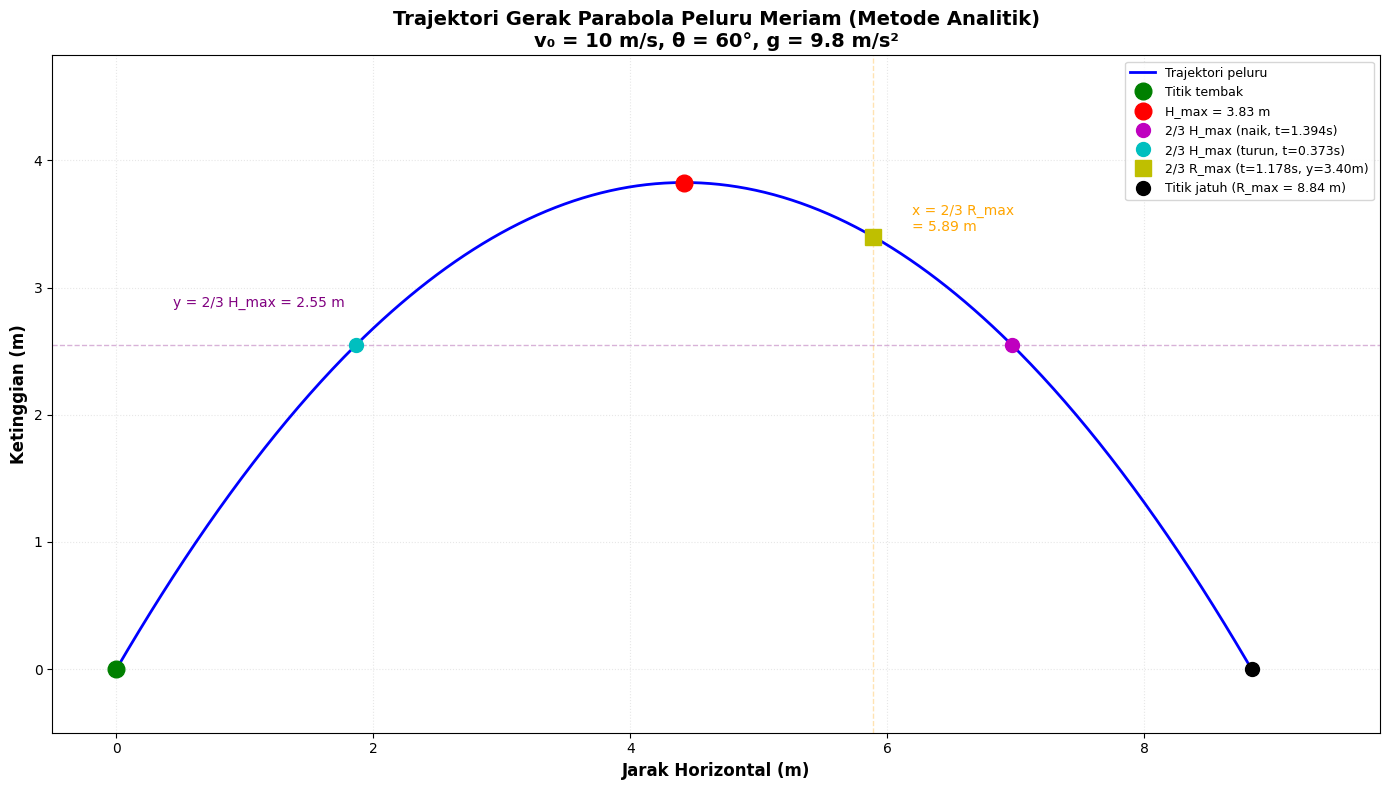

In [27]:
# Visualisasi Trajektori - Metode Analitik

# Array waktu untuk plot
t_array = np.linspace(0, t_total, 500)

# Posisi x dan y
x_array = v0x * t_array
y_array = v0y * t_array - 0.5 * g * t_array**2

# Plot
plt.figure(figsize=(14, 8))

plt.plot(x_array, y_array, 'b-', linewidth=2, label='Trajektori peluru')

# Titik-titik penting
plt.plot(0, 0, 'go', markersize=12, label='Titik tembak', zorder=5)

# Ketinggian maksimum
x_at_max_h = v0x * t_max_height
plt.plot(x_at_max_h, H_max, 'ro', markersize=12, label=f'H_max = {H_max:.2f} m', zorder=5)

# 2/3 ketinggian maksimum
x_at_t1 = v0x * t1
x_at_t2 = v0x * t2
plt.plot(x_at_t1, h_target, 'mo', markersize=10, label=f'2/3 H_max (naik, t={t1:.3f}s)', zorder=5)
plt.plot(x_at_t2, h_target, 'co', markersize=10, label=f'2/3 H_max (turun, t={t2:.3f}s)', zorder=5)

# 2/3 jarak maksimum
plt.plot(x_target, y_at_2_3_range, 'ys', markersize=12, 
         label=f'2/3 R_max (t={t_2_3_range:.3f}s, y={y_at_2_3_range:.2f}m)', zorder=5)

# Titik jatuh
plt.plot(R_max, 0, 'ko', markersize=10, label=f'Titik jatuh (R_max = {R_max:.2f} m)', zorder=5)

# Garis bantu
plt.axhline(y=h_target, color='purple', linestyle='--', alpha=0.3, linewidth=1)
plt.text(R_max*0.05, h_target + 0.3, f'y = 2/3 H_max = {h_target:.2f} m', 
         fontsize=10, color='purple')

plt.axvline(x=x_target, color='orange', linestyle='--', alpha=0.3, linewidth=1)
plt.text(x_target + 0.3, H_max*0.9, f'x = 2/3 R_max\n= {x_target:.2f} m', 
         fontsize=10, color='orange')

plt.xlabel('Jarak Horizontal (m)', fontsize=12, fontweight='bold')
plt.ylabel('Ketinggian (m)', fontsize=12, fontweight='bold')
plt.title('Trajektori Gerak Parabola Peluru Meriam (Metode Analitik)\n' + 
          f'v₀ = {v0} m/s, θ = {theta}°, g = {g} m/s²', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle=':')
plt.legend(loc='upper right', fontsize=9)
plt.xlim(-0.5, R_max + 1)
plt.ylim(-0.5, H_max + 1)
plt.tight_layout()
plt.show()

## 2.2 Metode Numerik - Gerak Parabola (Euler Method)

In [28]:
# Simulasi Numerik menggunakan Metode Euler

# Parameter simulasi
dt = 0.01  # time step (detik)
t_sim = 0
x_num = 0
y_num = 0
vx_num = v0x
vy_num = v0y

# Array untuk menyimpan hasil
t_num_array = [t_sim]
x_num_array = [x_num]
y_num_array = [y_num]

# Variabel untuk tracking
found_2_3_h_naik = False
found_2_3_h_turun = False
t_2_3_h_naik_num = None
t_2_3_h_turun_num = None
y_max_num = 0

found_2_3_r = False
t_2_3_r_num = None
y_at_2_3_r_num = None

print(f"Time step (delta t) = {dt} s")
print("Simulasi dimulai...")

# Loop simulasi
while y_num >= 0:
    # Percepatan
    ax = 0
    ay = -g
    
    # Update kecepatan (Metode Euler)
    vx_num_new = vx_num + ax * dt
    vy_num_new = vy_num + ay * dt
    
    # Update posisi
    x_num_new = x_num + vx_num * dt
    y_num_new = y_num + vy_num * dt
    
    # Update waktu
    t_sim += dt
    
    # Simpan data
    t_num_array.append(t_sim)
    x_num_array.append(x_num_new)
    y_num_array.append(y_num_new)
    
    # Track ketinggian maksimum
    if y_num_new > y_max_num:
        y_max_num = y_num_new
    
    # Track 2/3 H_max (naik)
    if not found_2_3_h_naik and y_num_new >= (2/3) * H_max and vy_num > 0:
        t_2_3_h_naik_num = t_sim
        found_2_3_h_naik = True
    
    # Track 2/3 H_max (turun)
    if not found_2_3_h_turun and y_num_new <= (2/3) * H_max and vy_num < 0 and y_num > (2/3) * H_max:
        t_2_3_h_turun_num = t_sim
        found_2_3_h_turun = True
    
    # Track 2/3 R_max
    if not found_2_3_r and x_num_new >= (2/3) * R_max:
        t_2_3_r_num = t_sim
        y_at_2_3_r_num = y_num_new
        found_2_3_r = True
    
    # Update untuk iterasi berikutnya
    x_num = x_num_new
    y_num = y_num_new
    vx_num = vx_num_new
    vy_num = vy_num_new
    
    # Safety break
    if t_sim > 10:
        break

# Convert to numpy array
t_num_array = np.array(t_num_array)
x_num_array = np.array(x_num_array)
y_num_array = np.array(y_num_array)

print(f"  Total iterasi: {len(t_num_array)}")
print(f"  Waktu simulasi: {t_sim:.4f} s")


Time step (delta t) = 0.01 s
Simulasi dimulai...
  Total iterasi: 179
  Waktu simulasi: 1.7800 s


In [29]:
# Hasil Numerik

print("\n" + "=" * 60)
print("HASIL METODE NUMERIK")
print("=" * 60)

print("\n1. PARAMETER MAKSIMUM (Numerik):")
print(f"  Ketinggian maksimum = {y_max_num:.4f} m")
print(f"  Jarak maksimum = {x_num_array[-1]:.4f} m")

print("\n2. WAKTU MENCAPAI 2/3 KETINGGIAN MAKSIMUM (Numerik):")
print(f"  Target ketinggian = {(2/3) * H_max:.4f} m")
if t_2_3_h_naik_num:
    print(f"  Saat naik  : t = {t_2_3_h_naik_num:.4f} s")
if t_2_3_h_turun_num:
    print(f"  Saat turun : t = {t_2_3_h_turun_num:.4f} s")

print("\n3. WAKTU MENCAPAI 2/3 JARAK MAKSIMUM (Numerik):")
print(f"  Target jarak = {(2/3) * R_max:.4f} m")
if t_2_3_r_num:
    print(f"  t = {t_2_3_r_num:.4f} s")
    print(f"  Ketinggian saat itu = {y_at_2_3_r_num:.4f} m")

print("=" * 60)


HASIL METODE NUMERIK

1. PARAMETER MAKSIMUM (Numerik):
  Ketinggian maksimum = 3.8699 m
  Jarak maksimum = 8.9000 m

2. WAKTU MENCAPAI 2/3 KETINGGIAN MAKSIMUM (Numerik):
  Target ketinggian = 2.5510 m
  Saat naik  : t = 0.3700 s
  Saat turun : t = 1.4100 s

3. WAKTU MENCAPAI 2/3 JARAK MAKSIMUM (Numerik):
  Target jarak = 5.8913 m
  t = 1.1800 s
  Ketinggian saat itu = 3.4542 m


## 2.3 Perbandingan Analitik vs Numerik - Gerak Parabola

In [30]:
# Tabel Perbandingan

print("PERBANDINGAN ANALITIK VS NUMERIK - GERAK PARABOLA")

print("\n1. Ketinggian Maksimum:")
print(f"  Analitik : {H_max:.4f} m")
print(f"  Numerik  : {y_max_num:.4f} m")
print(f"  Error    : {abs(H_max - y_max_num):.6f} m ({abs(H_max - y_max_num)/H_max*100:.4f}%)")

print("\n2. Jarak Maksimum:")
print(f"  Analitik : {R_max:.4f} m")
print(f"  Numerik  : {x_num_array[-1]:.4f} m")
print(f"  Error    : {abs(R_max - x_num_array[-1]):.6f} m ({abs(R_max - x_num_array[-1])/R_max*100:.4f}%)")

print("\n3. Waktu mencapai 2/3 H_max (saat naik):")
print(f"  Analitik : {t1:.4f} s")
if t_2_3_h_naik_num:
    print(f"  Numerik  : {t_2_3_h_naik_num:.4f} s")
    print(f"  Error    : {abs(t1 - t_2_3_h_naik_num):.6f} s ({abs(t1 - t_2_3_h_naik_num)/t1*100:.4f}%)")

print("\n4. Waktu mencapai 2/3 H_max (saat turun):")
print(f"  Analitik : {t2:.4f} s")
if t_2_3_h_turun_num:
    print(f"  Numerik  : {t_2_3_h_turun_num:.4f} s")
    print(f"  Error    : {abs(t2 - t_2_3_h_turun_num):.6f} s ({abs(t2 - t_2_3_h_turun_num)/t2*100:.4f}%)")

print("\n5. Waktu mencapai 2/3 R_max:")
print(f"  Analitik : {t_2_3_range:.4f} s")
if t_2_3_r_num:
    print(f"  Numerik  : {t_2_3_r_num:.4f} s")
    print(f"  Error    : {abs(t_2_3_range - t_2_3_r_num):.6f} s ({abs(t_2_3_range - t_2_3_r_num)/t_2_3_range*100:.4f}%)")

print("=" * 60)

PERBANDINGAN ANALITIK VS NUMERIK - GERAK PARABOLA

1. Ketinggian Maksimum:
  Analitik : 3.8265 m
  Numerik  : 3.8699 m
  Error    : 0.043415 m (1.1346%)

2. Jarak Maksimum:
  Analitik : 8.8370 m
  Numerik  : 8.9000 m
  Error    : 0.063006 m (0.7130%)

3. Waktu mencapai 2/3 H_max (saat naik):
  Analitik : 1.3939 s
  Numerik  : 0.3700 s
  Error    : 1.023903 s (73.4558%)

4. Waktu mencapai 2/3 H_max (saat turun):
  Analitik : 0.3735 s
  Numerik  : 1.4100 s
  Error    : 1.036505 s (277.5148%)

5. Waktu mencapai 2/3 R_max:
  Analitik : 1.1783 s
  Numerik  : 1.1800 s
  Error    : 0.001734 s (0.1472%)


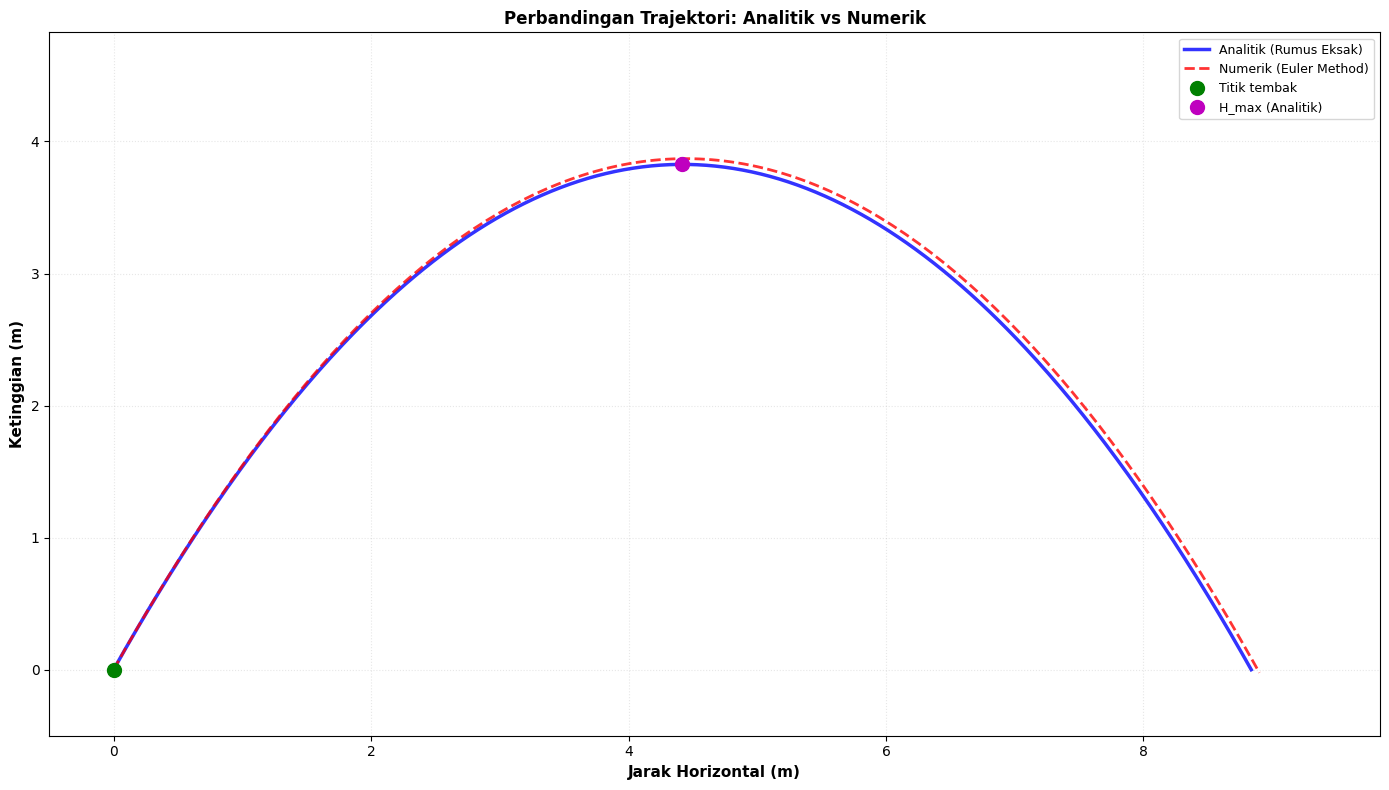

In [31]:
# PLOT 1: Trajektori Lengkap - Perbandingan

plt.figure(figsize=(14, 8))

plt.plot(x_array, y_array, 'b-', linewidth=2.5, label='Analitik (Rumus Eksak)', alpha=0.8)
plt.plot(x_num_array, y_num_array, 'r--', linewidth=2, label='Numerik (Euler Method)', alpha=0.8)

plt.plot(0, 0, 'go', markersize=10, label='Titik tembak', zorder=5)
plt.plot(x_at_max_h, H_max, 'mo', markersize=10, label='H_max (Analitik)', zorder=5)

plt.xlabel('Jarak Horizontal (m)', fontsize=11, fontweight='bold')
plt.ylabel('Ketinggian (m)', fontsize=11, fontweight='bold')
plt.title('Perbandingan Trajektori: Analitik vs Numerik', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle=':')
plt.legend(loc='upper right', fontsize=9)
plt.xlim(-0.5, R_max + 1)
plt.ylim(-0.5, H_max + 1)
plt.tight_layout()
plt.show()


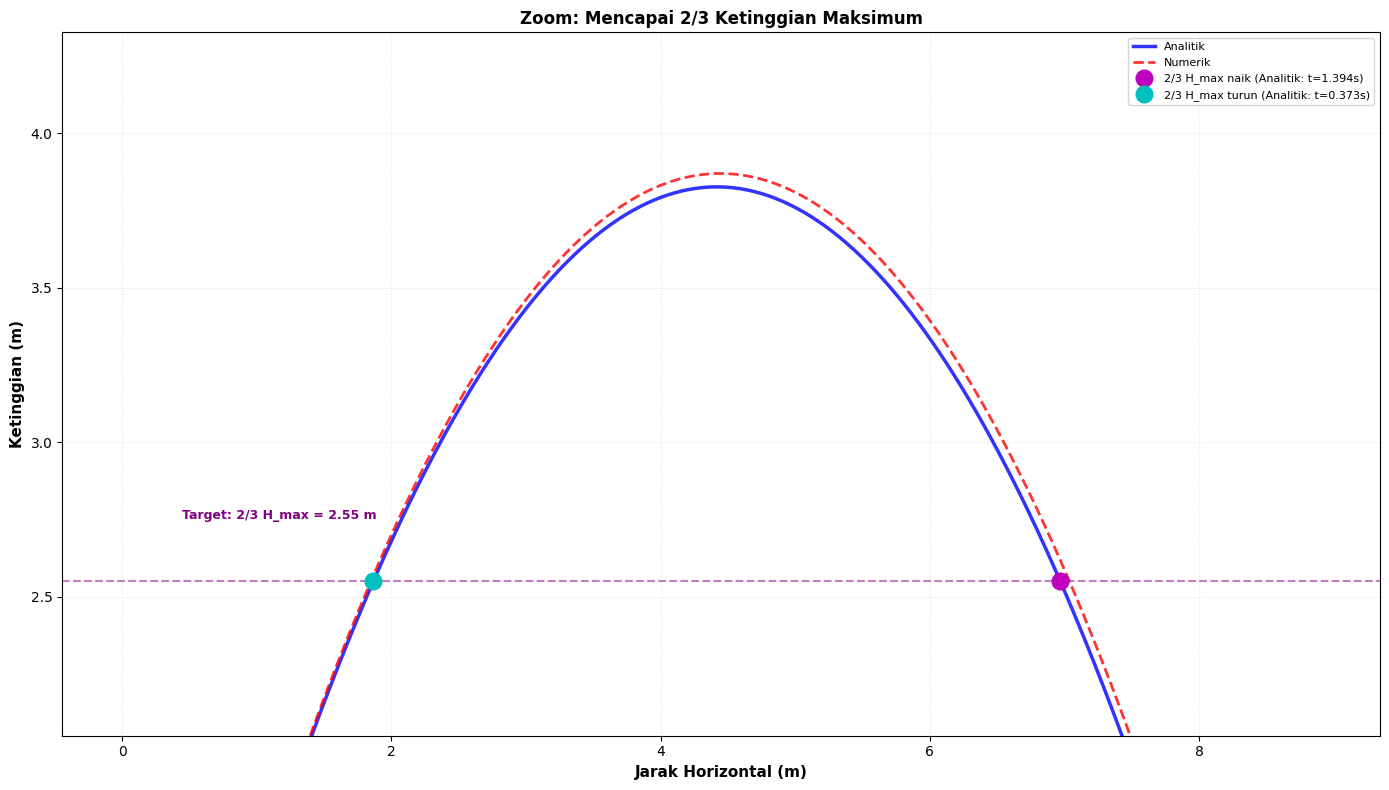

In [32]:
# PLOT 2: Zoom pada 2/3 Ketinggian Maksimum

plt.figure(figsize=(14, 8))

plt.plot(x_array, y_array, 'b-', linewidth=2.5, label='Analitik', alpha=0.8)
plt.plot(x_num_array, y_num_array, 'r--', linewidth=2, label='Numerik', alpha=0.8)

plt.plot(x_at_t1, h_target, 'mo', markersize=12, 
         label=f'2/3 H_max naik (Analitik: t={t1:.3f}s)', zorder=5)
plt.plot(x_at_t2, h_target, 'co', markersize=12, 
         label=f'2/3 H_max turun (Analitik: t={t2:.3f}s)', zorder=5)

plt.axhline(y=h_target, color='purple', linestyle='--', alpha=0.5, linewidth=1.5)
plt.text(R_max*0.05, h_target + 0.2, f'Target: 2/3 H_max = {h_target:.2f} m', 
         fontsize=9, color='purple', fontweight='bold')

plt.xlabel('Jarak Horizontal (m)', fontsize=11, fontweight='bold')
plt.ylabel('Ketinggian (m)', fontsize=11, fontweight='bold')
plt.title('Zoom: Mencapai 2/3 Ketinggian Maksimum', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle=':')
plt.legend(loc='upper right', fontsize=8)
plt.ylim(h_target - 0.5, H_max + 0.5)
plt.tight_layout()
plt.show()


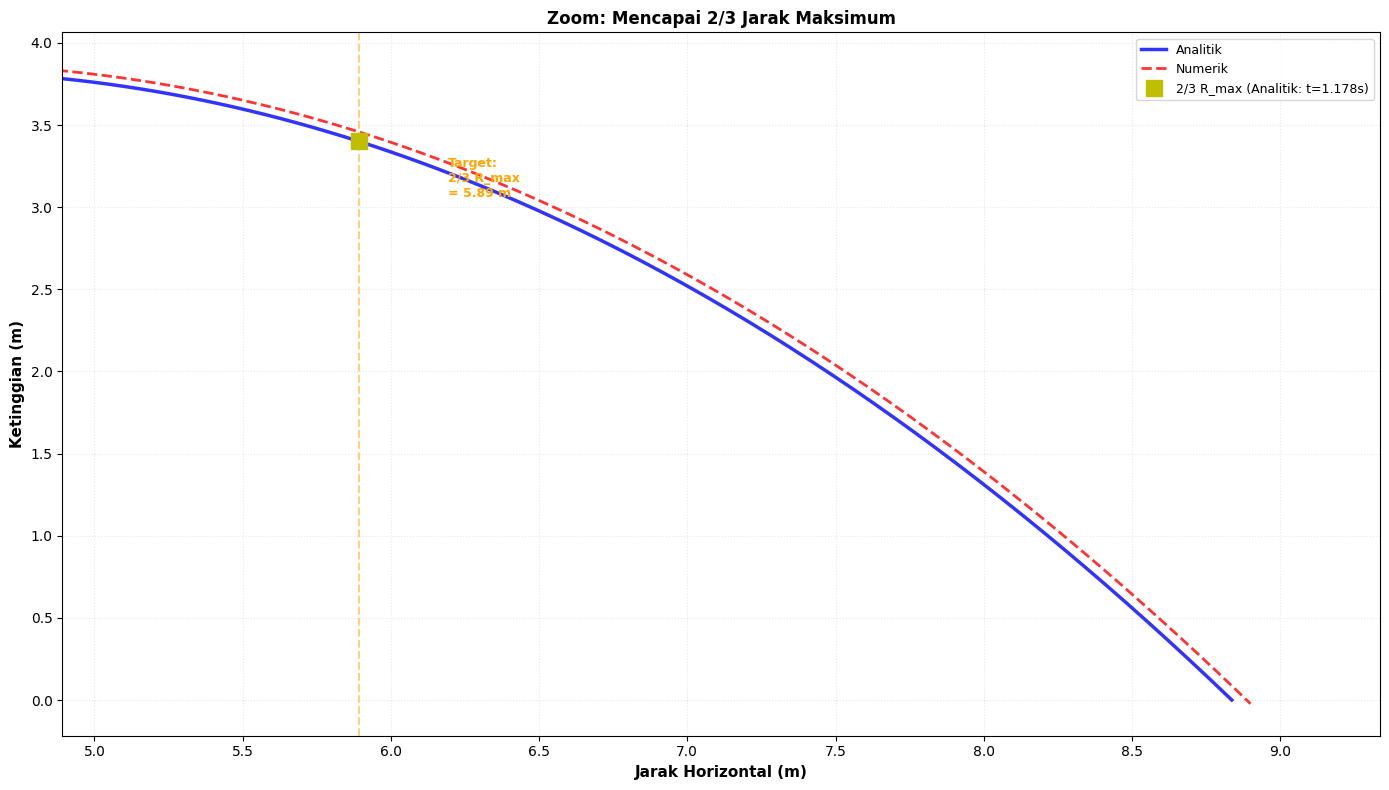

In [33]:
# PLOT 3: Zoom pada 2/3 Jarak Maksimum

plt.figure(figsize=(14, 8))

plt.plot(x_array, y_array, 'b-', linewidth=2.5, label='Analitik', alpha=0.8)
plt.plot(x_num_array, y_num_array, 'r--', linewidth=2, label='Numerik', alpha=0.8)

plt.plot(x_target, y_at_2_3_range, 'ys', markersize=12, 
         label=f'2/3 R_max (Analitik: t={t_2_3_range:.3f}s)', zorder=5)

plt.axvline(x=x_target, color='orange', linestyle='--', alpha=0.5, linewidth=1.5)
plt.text(x_target + 0.3, H_max*0.8, f'Target:\n2/3 R_max\n= {x_target:.2f} m', 
         fontsize=9, color='orange', fontweight='bold')

plt.xlabel('Jarak Horizontal (m)', fontsize=11, fontweight='bold')
plt.ylabel('Ketinggian (m)', fontsize=11, fontweight='bold')
plt.title('Zoom: Mencapai 2/3 Jarak Maksimum', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle=':')
plt.legend(loc='upper right', fontsize=9)
plt.xlim(x_target - 1, R_max + 0.5)
plt.tight_layout()
plt.show()


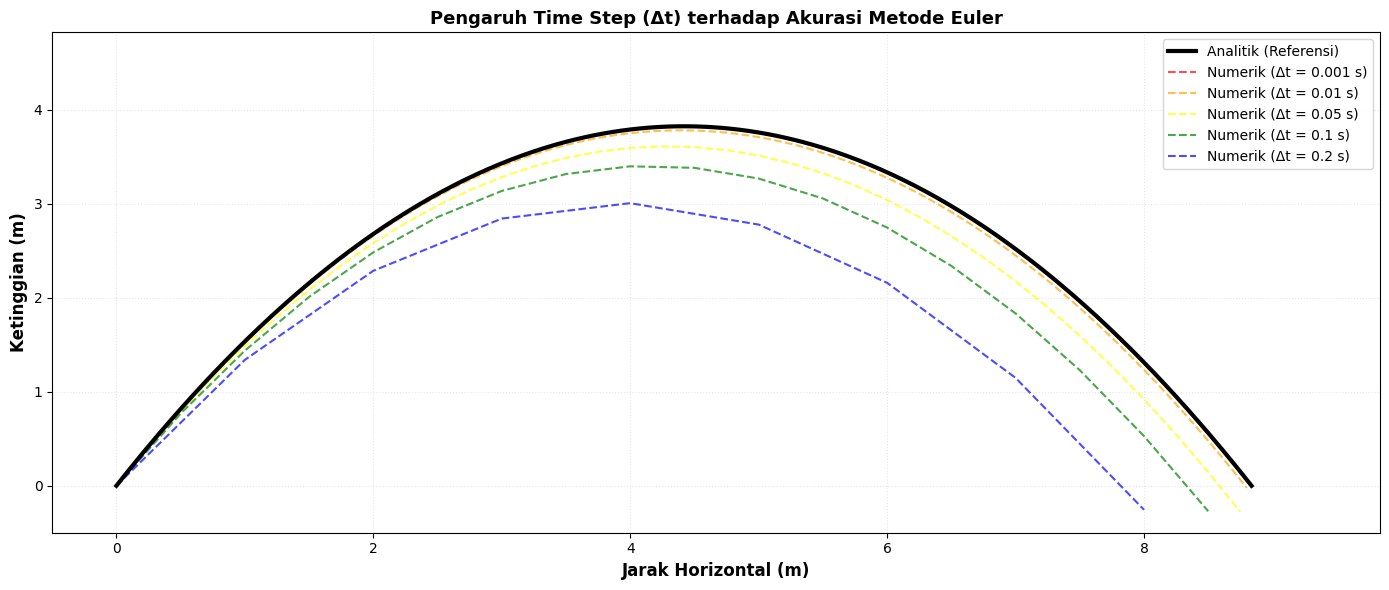

In [34]:
# PLOT 4: Pengaruh Time Step

time_steps = [0.001, 0.01, 0.05, 0.1, 0.2]
colors = ['red', 'orange', 'yellow', 'green', 'blue']

plt.figure(figsize=(14, 6))

plt.plot(x_array, y_array, 'k-', linewidth=3, label='Analitik (Referensi)', zorder=10)

for dt_test, color in zip(time_steps, colors):
    t_test = 0
    x_test = 0
    y_test = 0
    vx_test = v0x
    vy_test = v0y
    
    x_test_array = [x_test]
    y_test_array = [y_test]
    
    while y_test >= 0 and t_test < 10:
        vx_test = vx_test + 0 * dt_test
        vy_test = vy_test - g * dt_test
        x_test = x_test + vx_test * dt_test
        y_test = y_test + vy_test * dt_test
        t_test += dt_test
        
        x_test_array.append(x_test)
        y_test_array.append(y_test)
    
    plt.plot(x_test_array, y_test_array, '--', color=color, linewidth=1.5, 
             label=f'Numerik (Δt = {dt_test} s)', alpha=0.7)

plt.xlabel('Jarak Horizontal (m)', fontsize=12, fontweight='bold')
plt.ylabel('Ketinggian (m)', fontsize=12, fontweight='bold')
plt.title('Pengaruh Time Step (Δt) terhadap Akurasi Metode Euler', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle=':')
plt.legend(loc='upper right', fontsize=10)
plt.xlim(-0.5, R_max + 1)
plt.ylim(-0.5, H_max + 1)
plt.tight_layout()
plt.show()
